In [ ]:
import Pkg
Pkg.add("Plots")
Pkg.add("Gadfly")
using Plots
using Gadfly

## CHEME 5440 Problem Set 1
Gustavo Anaya  (gea25)

This notebook contains the worked out solutions to Problem Set 1 for:
    
1.    [a)](#1.-a)
   
2.    [b)](#2.-b)
   
3.    [c)](#3.-c)
   

### 1. a)
<a id='1.-a'></a>
Derive an expression for rhatX,P and estimate unknown parameter values appearing in rX,P using BioNumbers, literature or the CHEME-7770 GitHub parameter page.

    rhatX,P = rX,P * u(I)

    rX,p = kE,j * Rx,T * (Gj/(Kx,j*taux,j+Gj))
    
    taux,j = 40 s
    
    kE,j = 0.0156
    
    1/Kx,j = (k+/(k- + kI))  --> k+ = 0.024, k- ~= 0, kI = 0.025
    0.024/0.025 = 0.96 --> Kx,j = 1.0416667
    
    Rx,T = 5000 molecules/cell
    
    Gj = 2500 * 1*10^-12 = 2.5*10^-9
    
        
    
    
    


In [21]:
using Printf

Gj = 2.5*10^-9
rXp = 0.0156 * 5000 * (Gj/(1.0416667*40+Gj))
@printf "Rxp is equal to %0.4g mM/sec" rXp
println()
println("Rhatxp = 4.68e-09 * u(I)")


Rxp is equal to 4.68e-09 mM/sec
Rhatxp = 4.68e-09 * u(I)


### 2. b)
<a id='2.-b'></a>
Is transcription initiation or elongation limited?

_Transcription is **elongation** limited._

### 3. c)
<a id='3.-c'></a>
Plot (on a semi-log scale) the steady-state mRNA concentration mP(μmol/gDW) as a function inducer _I_ for I= 0.0001 mM to I= 10.0 mM. Let W1= 0.26, W2=300.0, K= 0.30 mM and n= 1.5.


    u(I) = (W1+W2*fI)/(1+W1+W2fI), fI = I^n/(K+I^n)
    
    mp = rx,p * U(I)/(kd + mu)
    
    mp = rhatxp /(kd + mu)


In [44]:
doublingtime = 1800
Rxp = 4.68e-09
n = 1.5
K = 0.3
W1 = 0.26
W2 = 300
mu = log(2)/doublingtime
kd = log(2)/60

#Inducer
I = 0.0001:10.0

#Multiply all coefficients together except for u(I)
coeff = Rxp/(kd+mu)
#function for steady-state mRNA concentration as a function of inducer concentration
m(I)= coeff*(W1 + W2 * (I.^n/(K+I.^n)))/(1+W1+W2*(I.^n/(K+I.^n))) 

m (generic function with 1 method)

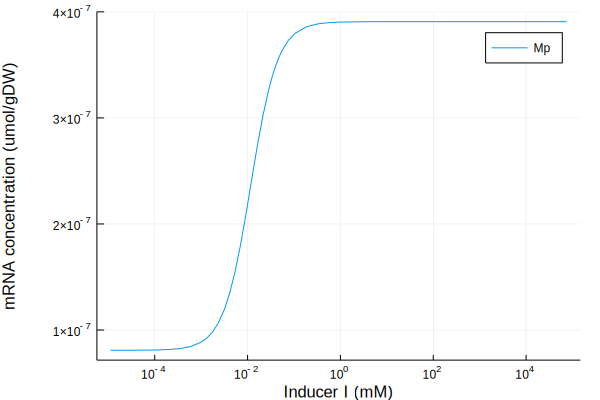

In [43]:
plot(m, xaxis=:log, xlabel="Inducer I (mM)", ylabel="mRNA concentration (umol/gDW)", label= "Mp") 
